# Linear Regression (Scalar Output)
### Without bias/offset

In [1]:

import numpy as np
from numpy.linalg import inv, matrix_rank, det

# Data matrix.
X = np.array([[-10], [-8], [-3], [-1], [2], [8]]) # size 6x1
y = np.array([[5], [5], [4], [3], [2], [2]])
Xt = np.array([[7], [9]])


In [2]:
# check inverse
X_sqr = X.T @ X
rank = matrix_rank(X_sqr)
print("X.T @ X is : "+ str(X_sqr))
print("X.T @ X rank is : "+ str(rank))
print("X.T @ X dimension is : "+ str(X_sqr.shape))

X.T @ X is : [[242]]
X.T @ X rank is : 1
X.T @ X dimension is : (1, 1)


In [3]:
# working out weight
w = inv(X.T @ X) @ X.T @ y
print("w: " + str(w))

w: [[-0.35123967]]


In [4]:
# prediction
y_pred = Xt @ w
print("y_pred: " + str(y_pred))

y_pred: [[-2.45867769]
 [-3.16115702]]


### with bias/offset

In [5]:
# Data matrix
X = np.array([[1, -10], [1, -8], [1, -3], [1, -1], [1, 2], [1, 8]]) # size 6x2
y = np.array([[5], [5], [4], [3], [2], [2]])
Xt = np.array([[1, 7], [1, 9]])

In [6]:
# check inverse
X_sqr = X.T @ X
rank = matrix_rank(X_sqr)
print("X.T @ X is : "+ str(X_sqr))
print("X.T @ X rank is : "+ str(rank))
print("X.T @ X dimension is : "+ str(X_sqr.shape))

X.T @ X is : [[  6 -12]
 [-12 242]]
X.T @ X rank is : 2
X.T @ X dimension is : (2, 2)


In [7]:
# working out weight
w = inv(X.T @ X) @ X.T @ y
print("w: " + str(w))

# prediction
y_pred = Xt @ w
print("y_pred: " + str(y_pred))

w: [[ 3.10550459]
 [-0.19724771]]
y_pred: [[1.72477064]
 [1.33027523]]


# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([[-10], [-8], [-3], [-1], [2], [8]])
y = np.array([[5], [5], [4], [3], [2], [2]])
Xt = np.array([[7], [9]])
# Generate polynomial features
order = 3
poly = PolynomialFeatures(order) # generate polynomial features.
P = poly.fit_transform(X) # transform X to P.
Pt = poly.fit_transform(Xt)
print("P:\n", P)
print("Pt:\n", Pt)

P:
 [[    1.   -10.   100. -1000.]
 [    1.    -8.    64.  -512.]
 [    1.    -3.     9.   -27.]
 [    1.    -1.     1.    -1.]
 [    1.     2.     4.     8.]
 [    1.     8.    64.   512.]]
Pt:
 [[  1.   7.  49. 343.]
 [  1.   9.  81. 729.]]


In [9]:
# check inverse
P_sqr = P.T @ P
rank = matrix_rank(P_sqr)
print("P.T @ P is : "+ str(P_sqr))
print("P.T @ P rank is : "+ str(rank))
print("P.T @ P dimension is : "+ str(P_sqr.shape))

P.T @ P is : [[ 6.000000e+00 -1.200000e+01  2.420000e+02 -1.020000e+03]
 [-1.200000e+01  2.420000e+02 -1.020000e+03  1.829000e+04]
 [ 2.420000e+02 -1.020000e+03  1.829000e+04 -1.002120e+05]
 [-1.020000e+03  1.829000e+04 -1.002120e+05  1.525082e+06]]
P.T @ P rank is : 4
P.T @ P dimension is : (4, 4)


In [10]:
# working out weight
w = inv(P.T @ P) @ P.T @ y
print("w: " + str(w))

# prediction
y_pred = Pt @ w
print("y_pred: " + str(y_pred))

w: [[ 2.68935636]
 [-0.37722517]
 [ 0.01343815]
 [ 0.00285772]]
y_pred: [[1.68744746]
 [2.46609771]]


# Ridge Regression

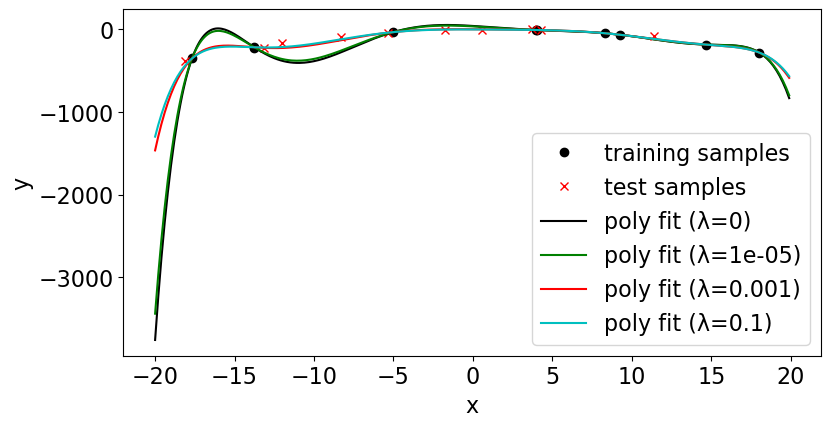

In [11]:
# Set random seed (for reproducibility)
np.random.seed(42)
# True quadratic polynomial: y = bx^2 + cx + d + noise
b, c, d = -1.0, 2.0, 5.0

# training data
n_train = 10  # number of training samples
x = np.random.uniform(-20, 20, size=n_train)
noise = np.random.normal(0, 5, size=n_train)
y = b * x**2 + c * x + d + noise

# test data
xt = np.random.uniform(-20, 20, size=10)
yt = b * xt**2 + c * xt + d + np.random.normal(0, 5, size=xt.shape[0])*3

x_plot = np.arange(-20, 20, 0.1)

# Generate polynomial features
order = 8
poly = PolynomialFeatures(order)
P = poly.fit_transform(x.reshape(-1, 1))
P_plot = poly.fit_transform(x_plot.reshape(-1, 1))

# plot
import matplotlib.pyplot as plt
lamda_list = [0, 0.00001, 0.001, 0.1]
color_list = ["k", "g", "r", "c"]

plt.figure(0, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(x, y, 'o', color='k', label='training samples') 
plt.plot(xt, yt, 'x', color='r', label='test samples') 

for color, lamda in zip(color_list, lamda_list):
    # working out weight
    w = inv(P.T @ P + lamda * np.eye(P.shape[1])) @ P.T @ y
    y_plot = P_plot @ w
    plt.plot(x_plot, y_plot, color=color, label=f'poly fit (λ={lamda})')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
